In [0]:
import os
from google.colab import drive
drive.mount('/content/drive')
directory='/content/drive/My Drive'
os.chdir(directory)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
dfs = pd.read_excel('leading.xlsx', sheet_name='Data')

In [0]:
dfs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

In [0]:
df_rd = dfs[dfs['Department']=='Research & Development']

In [0]:
dfs['Department'].value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

In [0]:
df_rd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 961 entries, 1 to 1469
Data columns (total 35 columns):
Age                         961 non-null int64
Attrition                   961 non-null object
BusinessTravel              961 non-null object
DailyRate                   961 non-null int64
Department                  961 non-null object
DistanceFromHome            961 non-null int64
Education                   961 non-null int64
EducationField              961 non-null object
EmployeeCount               961 non-null int64
EmployeeNumber              961 non-null int64
EnvironmentSatisfaction     961 non-null int64
Gender                      961 non-null object
HourlyRate                  961 non-null int64
JobInvolvement              961 non-null int64
JobLevel                    961 non-null int64
JobRole                     961 non-null object
JobSatisfaction             961 non-null int64
MaritalStatus               961 non-null object
MonthlyIncome               961 non-null 

In [0]:
df_rd

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,4,Male,79,3,1,Laboratory Technician,4,Single,3068,11864,0,Y,No,13,3,3,80,0,8,2,2,7,7,3,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1463,31,No,Non-Travel,325,Research & Development,5,3,Medical,1,2057,2,Male,74,3,2,Manufacturing Director,1,Single,9936,3787,0,Y,No,19,3,2,80,0,10,2,3,9,4,1,7
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3


In [0]:
df_rd.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,961.000000,961.000000,961.000000,961.000000,961.0,961.000000,961.000000,961.000000,961.000000,961.000000,961.000000,961.000000,961.000000,961.000000,961.000000,961.000000,961.000000,961.0,961.000000,961.000000,961.000000,961.000000,961.000000,961.000000,961.000000,961.000000
mean,37.042664,806.851197,9.144641,2.899063,1.0,1006.503642,2.744017,66.167534,2.741935,1.977107,2.726327,6281.252862,14284.865765,2.733611,15.291363,3.162331,2.708637,80.0,0.804370,11.342352,2.792924,2.725286,6.864724,4.155047,2.137357,4.084287
std,9.178964,402.513333,8.122044,1.024293,0.0,602.681958,1.102567,20.249281,0.714435,1.152667,1.101620,4895.835087,7081.255126,2.502874,3.701129,0.368946,1.070640,0.0,0.857092,7.797326,1.314103,0.716964,6.024119,3.646045,3.200565,3.571031
min,18.000000,102.000000,1.000000,1.000000,1.0,2.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,469.000000,2.000000,2.000000,1.0,460.000000,2.000000,49.000000,2.000000,1.000000,2.000000,2741.000000,8007.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,810.000000,7.000000,3.000000,1.0,1014.000000,3.000000,66.000000,3.000000,2.000000,3.000000,4374.000000,14242.000000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1153.000000,14.000000,4.000000,1.0,1539.000000,4.000000,84.000000,3.000000,3.000000,4.000000,7655.000000,20284.000000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,16.000000,3.000000,3.000000,9.000000,7.000000,2.000000,7.000000
max,60.000000,1496.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


**Split Attrition**

In [0]:
df_rd['Attrition'].value_counts()

No     828
Yes    133
Name: Attrition, dtype: int64

In [0]:
yes = df_rd[df_rd['Attrition']=='Yes']
no = df_rd[df_rd['Attrition']=='No']

**Assessment**

In [0]:
def describe_category(df):
  col = df.columns.values.tolist()
  df1 = pd.DataFrame(df[col1[0]].value_counts())
  df1 = pd.DataFrame.sort_index(df1)
  if len(col) == 1:
    return df1
  else:
    for i in range(1, len(col)):
      df2 = pd.DataFrame(df[col1[i]].value_counts())
      df1 = pd.merge(df1, df2, how='outer', left_index=True, right_index=True)
    return df1

In [0]:
col1 = ['EnvironmentSatisfaction','JobInvolvement','JobSatisfaction','PerformanceRating','RelationshipSatisfaction']
df_y = yes[col1]
df_n = no[col1]
df_t = df_rd[col1]

In [0]:
dy = describe_category(df_y)
dy.PerformanceRating.fillna(0,inplace=True)
dy = dy.to_dict('list')
dt = describe_category(df_t)
dt.PerformanceRating.fillna(0,inplace=True)
dt = dt.to_dict('list')
dn = describe_category(df_n)
dn.PerformanceRating.fillna(0,inplace=True)
dn = dn.to_dict('list')

In [0]:
describe_category(df_y)/1.33

,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,PerformanceRating,RelationshipSatisfaction
1,32.330827,9.022556,28.571429,NaN,27.819549
2,13.533835,30.075188,18.045113,NaN,19.548872
3,28.571429,57.142857,32.330827,80.451128,25.563910
4,25.563910,3.759398,21.052632,19.548872,27.067669


In [0]:
describe_category(df_n)/8.28

,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,PerformanceRating,RelationshipSatisfaction
1,17.391304,4.710145,18.599034,NaN,16.425121
2,19.202899,25.120773,18.115942,NaN,22.463768
3,30.676329,58.454106,31.038647,84.299517,31.884058
4,32.729469,11.714976,32.246377,15.700483,29.227053


(<Figure size 662.4x360 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f8b67e26ba8>)

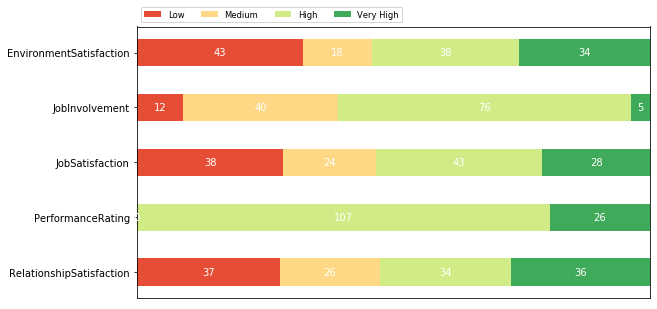

In [0]:
import numpy as np
import matplotlib.pyplot as plt


category_names = ['Low', 'Medium','High', 'Very High']



def survey(results, category_names):
    """
    Parameters
    ----------
    results : dict
        A mapping from question labels to a list of answers per category.
        It is assumed all lists contain the same number of entries and that
        it matches the length of *category_names*.
    category_names : list of str
        The category labels.
    """
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.get_cmap('RdYlGn')(
        np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(9.2, 5))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        ax.barh(labels, widths, left=starts, height=0.5,
                label=colname, color=color)
        xcenters = starts + widths / 2

        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
        for y, (x, c) in enumerate(zip(xcenters, widths)):
            ax.text(x, y, str(int(c)), ha='center', va='center',
                    color=text_color)
    ax.legend(ncol=len(category_names), bbox_to_anchor=(0, 1),
              loc='lower left', fontsize='small')

    return fig, ax


survey(dy, category_names)

(<Figure size 662.4x360 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f8b67af7860>)

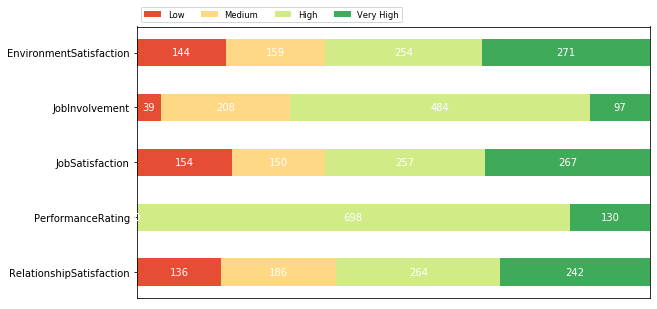

In [0]:
survey(dn,category_names)

(<Figure size 662.4x360 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f8b6a7adfd0>)

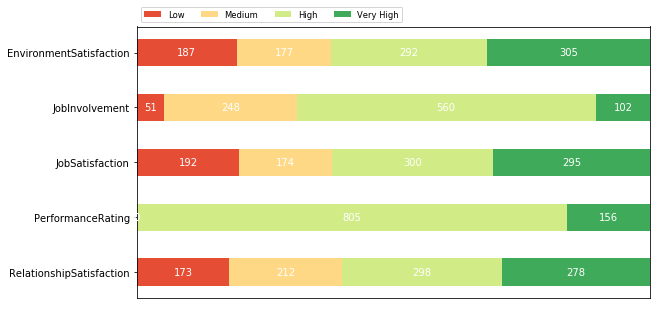

In [0]:
survey(dt, category_names)

**Demographic**

In [0]:
df_rd['Over18'].value_counts()

Y    961
Name: Over18, dtype: int64

In [0]:
col2 = ['Attrition','Gender','OverTime']

In [0]:
df_rd['Gender'].value_counts()


Male      582
Female    379
Name: Gender, dtype: int64

In [0]:
yes['Gender'].value_counts()


Male      90
Female    43
Name: Gender, dtype: int64

In [0]:
no['Gender'].value_counts()

Male      492
Female    336
Name: Gender, dtype: int64

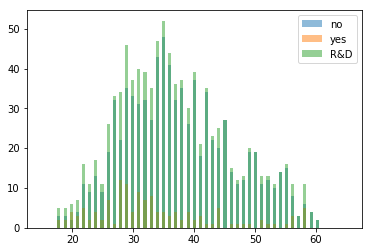

In [0]:
import random
import numpy
from matplotlib import pyplot

y = yes['Age'] 
n = no['Age']
rd = df_rd['Age']

bins = numpy.linspace(15, 65, 100)

pyplot.hist(n, bins, alpha=0.5, label='no')
pyplot.hist(y, bins, alpha=0.5, label='yes')
pyplot.hist(rd, bins, alpha=0.5, label='R&D')
pyplot.legend(loc='upper right')
pyplot.show()

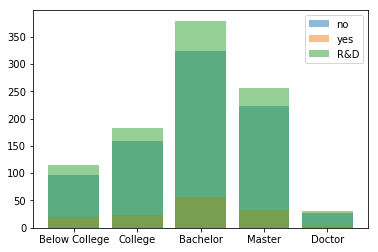

In [0]:
import numpy as np
df1 = pd.DataFrame(df_rd['Education'].value_counts())
df1 = pd.DataFrame.sort_index(df1)
df2 = pd.DataFrame(yes['Education'].value_counts())
df2 = pd.DataFrame.sort_index(df2)
df3 = pd.DataFrame(no['Education'].value_counts())
df3 = pd.DataFrame.sort_index(df3)
y = df2['Education'] 
n = df3['Education']
rd = df1['Education']

ind = np.arange(5)
pyplot.bar(ind, n, alpha=0.5, label='no')
pyplot.bar(ind, y, alpha=0.5, label='yes')
pyplot.bar(ind, rd, alpha=0.5, label='R&D')
pyplot.legend(loc='upper right')
pyplot.xticks(ind, ('Below College', 'College', 'Bachelor', 'Master', 'Doctor'))
pyplot.show()

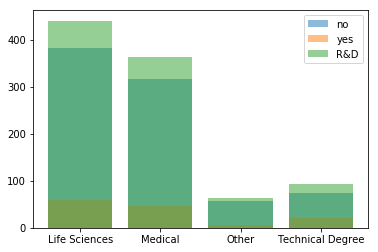

In [0]:
df1 = pd.DataFrame(df_rd['EducationField'].value_counts())
df1 = pd.DataFrame.sort_index(df1)
df2 = pd.DataFrame(yes['EducationField'].value_counts())
df2 = pd.DataFrame.sort_index(df2)
df3 = pd.DataFrame(no['EducationField'].value_counts())
df3 = pd.DataFrame.sort_index(df3)
y = df2['EducationField'] 
n = df3['EducationField']
rd = df1['EducationField']

ind = np.arange(4)
pyplot.bar(ind, n, alpha=0.5, label='no')
pyplot.bar(ind, y, alpha=0.5, label='yes')
pyplot.bar(ind, rd, alpha=0.5, label='R&D')
pyplot.legend(loc='upper right')
pyplot.xticks(ind, ('Life Sciences', 'Medical', 'Other', 'Technical Degree'))
pyplot.show()

In [0]:
df_rd['MaritalStatus'].value_counts()

Married     433
Single      304
Divorced    224
Name: MaritalStatus, dtype: int64

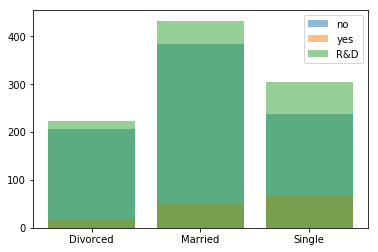

In [0]:
df1 = pd.DataFrame(df_rd['MaritalStatus'].value_counts())
df1 = pd.DataFrame.sort_index(df1)
df2 = pd.DataFrame(yes['MaritalStatus'].value_counts())
df2 = pd.DataFrame.sort_index(df2)
df3 = pd.DataFrame(no['MaritalStatus'].value_counts())
df3 = pd.DataFrame.sort_index(df3)
y = df2['MaritalStatus'] 
n = df3['MaritalStatus']
rd = df1['MaritalStatus']

ind = np.arange(3)
pyplot.bar(ind, n, alpha=0.5, label='no')
pyplot.bar(ind, y, alpha=0.5, label='yes')
pyplot.bar(ind, rd, alpha=0.5, label='R&D')
pyplot.legend(loc='upper right')
pyplot.xticks(ind, ('Divorced', 'Married', 'Single'))
pyplot.show()

**Working Experience**

In [0]:
df_rd.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,961.000000,961.000000,961.000000,961.000000,961.0,961.000000,961.000000,961.000000,961.000000,961.000000,961.000000,961.000000,961.000000,961.000000,961.000000,961.000000,961.000000,961.0,961.000000,961.000000,961.000000,961.000000,961.000000,961.000000,961.000000,961.000000
mean,37.042664,806.851197,9.144641,2.899063,1.0,1006.503642,2.744017,66.167534,2.741935,1.977107,2.726327,6281.252862,14284.865765,2.733611,15.291363,3.162331,2.708637,80.0,0.804370,11.342352,2.792924,2.725286,6.864724,4.155047,2.137357,4.084287
std,9.178964,402.513333,8.122044,1.024293,0.0,602.681958,1.102567,20.249281,0.714435,1.152667,1.101620,4895.835087,7081.255126,2.502874,3.701129,0.368946,1.070640,0.0,0.857092,7.797326,1.314103,0.716964,6.024119,3.646045,3.200565,3.571031
min,18.000000,102.000000,1.000000,1.000000,1.0,2.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,469.000000,2.000000,2.000000,1.0,460.000000,2.000000,49.000000,2.000000,1.000000,2.000000,2741.000000,8007.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,810.000000,7.000000,3.000000,1.0,1014.000000,3.000000,66.000000,3.000000,2.000000,3.000000,4374.000000,14242.000000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1153.000000,14.000000,4.000000,1.0,1539.000000,4.000000,84.000000,3.000000,3.000000,4.000000,7655.000000,20284.000000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,16.000000,3.000000,3.000000,9.000000,7.000000,2.000000,7.000000
max,60.000000,1496.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


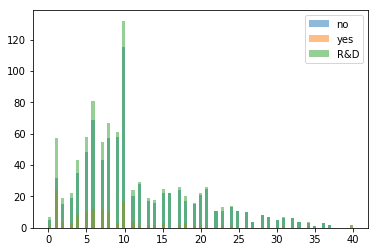

In [0]:
y = yes['TotalWorkingYears'] 
n = no['TotalWorkingYears']
rd = df_rd['TotalWorkingYears']

bins = numpy.linspace(0, 40, 100)

pyplot.hist(n, bins, alpha=0.5, label='no')
pyplot.hist(y, bins, alpha=0.5, label='yes')
pyplot.hist(rd, bins, alpha=0.5, label='R&D')
pyplot.legend(loc='upper right')
pyplot.show()

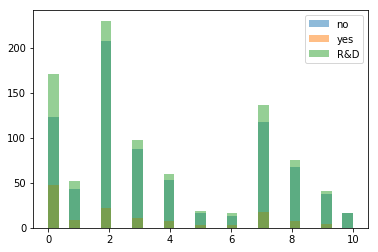

In [0]:
y = yes['YearsWithCurrManager'] 
n = no['YearsWithCurrManager']
rd = df_rd['YearsWithCurrManager']

bins = numpy.linspace(0, 10, 30)

pyplot.hist(n, bins, alpha=0.5, label='no')
pyplot.hist(y, bins, alpha=0.5, label='yes')
pyplot.hist(rd, bins, alpha=0.5, label='R&D')
pyplot.legend(loc='upper right')
pyplot.show()

**Working** **hour**

In [0]:
df_rd['StandardHours'].value_counts()

80    961
Name: StandardHours, dtype: int64

In [0]:
df_rd['OverTime'].value_counts()

No     690
Yes    271
Name: OverTime, dtype: int64

In [0]:
yes['OverTime'].value_counts()

Yes    74
No     59
Name: OverTime, dtype: int64

In [0]:
no['OverTime'].value_counts()

No     631
Yes    197
Name: OverTime, dtype: int64

**Working condition**

In [0]:
df_rd['BusinessTravel'].value_counts()

Travel_Rarely        682
Travel_Frequently    182
Non-Travel            97
Name: BusinessTravel, dtype: int64

In [0]:
df_rd['JobRole'].value_counts()

Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Research Director             80
Manager                       54
Name: JobRole, dtype: int64

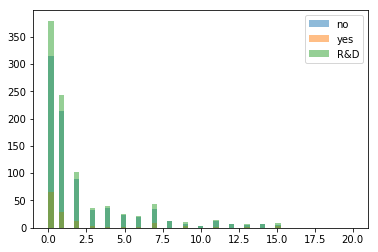

In [0]:
y = yes['YearsSinceLastPromotion'] 
n = no['YearsSinceLastPromotion']
rd = df_rd['YearsSinceLastPromotion']

bins = numpy.linspace(0, 20, 60)

pyplot.hist(n, bins, alpha=0.5, label='no')
pyplot.hist(y, bins, alpha=0.5, label='yes')
pyplot.hist(rd, bins, alpha=0.5, label='R&D')
pyplot.legend(loc='upper right')
pyplot.show()

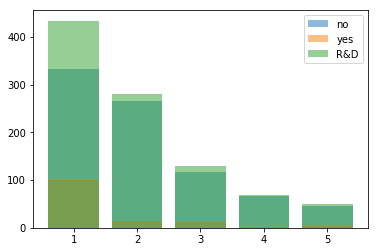

In [0]:
df1 = pd.DataFrame(df_rd['JobLevel'].value_counts())
df1 = pd.DataFrame.sort_index(df1)
df2 = pd.DataFrame(yes['JobLevel'].value_counts())
df2 = pd.DataFrame.sort_index(df2)
df3 = pd.DataFrame(no['JobLevel'].value_counts())
df3 = pd.DataFrame.sort_index(df3)
y = df2['JobLevel'] 
n = df3['JobLevel']
rd = df1['JobLevel']

ind = np.arange(5)
pyplot.bar(ind, n, alpha=0.5, label='no')
pyplot.bar(ind, y, alpha=0.5, label='yes')
pyplot.bar(ind, rd, alpha=0.5, label='R&D')
pyplot.legend(loc='upper right')
pyplot.xticks(ind, ('1','2','3','4','5'))
pyplot.show()

In [0]:
df3

,JobLevel
1,333
2,266
3,116
4,67
5,46


**benefits**

In [0]:
df_rd['StockOptionLevel'].value_counts()

0    407
1    393
2    103
3     58
Name: StockOptionLevel, dtype: int64

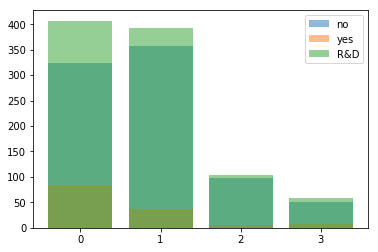

In [0]:
df1 = pd.DataFrame(df_rd['StockOptionLevel'].value_counts())
df1 = pd.DataFrame.sort_index(df1)
df2 = pd.DataFrame(yes['StockOptionLevel'].value_counts())
df2 = pd.DataFrame.sort_index(df2)
df3 = pd.DataFrame(no['StockOptionLevel'].value_counts())
df3 = pd.DataFrame.sort_index(df3)
y = df2['StockOptionLevel'] 
n = df3['StockOptionLevel']
rd = df1['StockOptionLevel']

ind = np.arange(4)
pyplot.bar(ind, n, alpha=0.5, label='no')
pyplot.bar(ind, y, alpha=0.5, label='yes')
pyplot.bar(ind, rd, alpha=0.5, label='R&D')
pyplot.legend(loc='upper right')
pyplot.xticks(ind, ('0', '1', '2','3'))
pyplot.show()

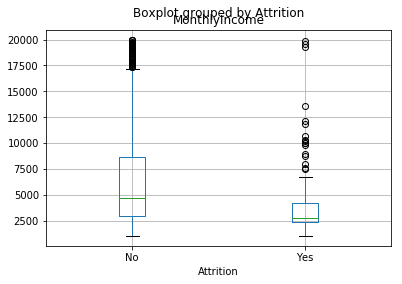

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

df_rd.boxplot(column=['MonthlyIncome'], by='Attrition')

In [0]:
df_rd[['DailyRate', 'HourlyRate', 'MonthlyRate', 'MonthlyIncome', 'PercentSalaryHike']]

,DailyRate,HourlyRate,MonthlyRate,MonthlyIncome,PercentSalaryHike
1,279,61,24907,5130,23
2,1373,92,2396,2090,15
3,1392,56,23159,2909,11
4,591,40,16632,3468,12
5,1005,79,11864,3068,13
6,1324,81,9964,2670,20
7,1358,67,13335,2693,22
8,216,44,8787,9526,21
9,1299,94,16577,5237,13
10,809,84,16479,2426,13
